# Các Công Việc:

1. Các thống kê về dữ liệu : (Góc mặt, chất lượng)
2. Biểu đồ Boxplot
3. Biểu đồ đánh giá độ chính xác trong dự đoán về giới tính,tuổi ..  Nhận xét
4. Phát biểu giả thuyết và nhận xét các phép kiểm định, vẽ các biểu đồ còn lại

In [1]:

# install.packages("ggcharts")
# install.packages("rhandsontable")
# install.packages("gridExtra")
# install.packages("Hmisc")
# install.packages("tidyverse")
# install.packages("plyr")
# install.packages("corrplot")
# install.packages("ggpubr")
# install.packages("ggstatsplot")
# install.packages("palmerpenguins")
library(ggstatsplot)
library(palmerpenguins)
library(ggpubr)
library(tidyverse)
library(Hmisc)
library(rhandsontable)
library(readxl)
library(plyr)
library(corrplot)
# turn off warning
options(warn=0)

Warning message:
"package 'ggstatsplot' was built under R version 4.1.3"
Registered S3 method overwritten by 'parameters':
  method                         from      
  format.parameters_distribution datawizard

You can cite this package as:
     Patil, I. (2021). Visualizations with statistical details: The 'ggstatsplot' approach.
     Journal of Open Source Software, 6(61), 3167, doi:10.21105/joss.03167

Warning message:
"package 'palmerpenguins' was built under R version 4.1.3"
Warning message:
"package 'ggpubr' was built under R version 4.1.3"
Loading required package: ggplot2

Warning message:
"package 'tidyverse' was built under R version 4.1.3"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v tibble  3.1.6     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.1.1     v forcats 0.5.1
v purrr   0.3.4     

-- Conflicts ---------------------------------------------------------------------------

Đọc Dữ liệu


In [2]:
df <- read.csv('Data_analyze.csv', header = TRUE, quote = "\"",  fill = TRUE, comment.char = "", encoding = "UTF-8")
df <- subset( df, select = - X)
df <- subset( df, select = - Age_group)

In [3]:
df

,Img,Age,Gender,Quality,Face_angle,Guess_age,Guess_gender,Guess_race,Guess_emotion
,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
1,img1,3,Boy,Normal,Straight,28,Man,asian,angry
2,img2,4,Girl,Normal,Straight,28,Man,asian,angry
3,img3,2,Girl,Poor,Straight,20,Woman,asian,happy
4,img4,4,Girl,Normal,Straight,33,Woman,asian,happy
5,img5,3,Girl,Normal,Right,29,Man,asian,neutral
6,img6,1,Girl,Good,Straight,29,Woman,asian,fear
7,img7,3,Boy,Good,Left,28,Man,asian,surprise
8,img8,2,Boy,Poor,Straight,28,Man,asian,neutral
9,img9,1,Boy,Poor,Straight,28,Woman,asian,fear


In [4]:
# shows the structure of the data frame
str(df)

'data.frame':	247 obs. of  9 variables:
 $ Img          : chr  "img1" "img2" "img3" "img4" ...
 $ Age          : int  3 4 2 4 3 1 3 2 1 1 ...
 $ Gender       : chr  "Boy" "Girl" "Girl" "Girl" ...
 $ Quality      : chr  "Normal" "Normal" "Poor" "Normal" ...
 $ Face_angle   : chr  "Straight" "Straight" "Straight" "Straight" ...
 $ Guess_age    : int  28 28 20 33 29 29 28 28 28 20 ...
 $ Guess_gender : chr  "Man" "Man" "Woman" "Woman" ...
 $ Guess_race   : chr  "asian" "asian" "asian" "asian" ...
 $ Guess_emotion: chr  "angry" "angry" "happy" "happy" ...


In [5]:
describe(df)

df 

 9  Variables      247  Observations
--------------------------------------------------------------------------------
Img 
       n  missing distinct 
     247        0      247 

lowest : img1   img10  img101 img102 img103, highest: img87  img88  img89  img9   img90 
--------------------------------------------------------------------------------
Age 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     247        0       81        1    34.23     26.9      4.0      6.6 
     .25      .50      .75      .90      .95 
    14.0     28.0     53.0     72.0     77.0 

lowest :  1  2  3  4  5, highest: 80 82 85 86 87
--------------------------------------------------------------------------------
Gender 
       n  missing distinct 
     247        0        5 

lowest : boy  Boy  Boy  girl Girl, highest: boy  Boy  Boy  girl Girl
                                        
Value        boy   Boy   Boy  girl  Girl
Frequency     13   121     1    16    96
Proportion 0.0

In [6]:
Age_group <- list()
for (i in df[,c('Age')]) {
    if (i <= 5){
        Age_group <- c(Age_group, 'less than 5')
    } else if (i <= 10) {
       Age_group <- c(Age_group, '5 to 10')
    } else if (i <= 15) {
       Age_group <- c(Age_group, '10 to 15')
    } else if (i <= 20) {
       Age_group <- c(Age_group, '15 to 20')
    } else if (i <= 30) {
       Age_group <- c(Age_group, '20 to 30')
    } else if (i <= 40) {
       Age_group <- c(Age_group, '30 to 40')
    } else if (i <= 50) {
       Age_group <- c(Age_group, '40 to 50')
    } else if (i <= 60) {
       Age_group <- c(Age_group, '50 to 60')
    } else if (i <= 70) {
       Age_group <- c(Age_group, '60 to 70')
    } else {
       Age_group <- c(Age_group, '70 and up')
    }  
}

In [7]:
index = 1
for (i in df[,c('Gender')]) {
    if (i == 'Boy' || i == 'boy'){
        df[,c('Gender')][index] <- 'Man'
    } else {
        df[,c('Gender')][index] <- 'Woman'
    }
    index <- index + 1 
}
df

,Img,Age,Gender,Quality,Face_angle,Guess_age,Guess_gender,Guess_race,Guess_emotion
,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
1,img1,3,Man,Normal,Straight,28,Man,asian,angry
2,img2,4,Woman,Normal,Straight,28,Man,asian,angry
3,img3,2,Woman,Poor,Straight,20,Woman,asian,happy
4,img4,4,Woman,Normal,Straight,33,Woman,asian,happy
5,img5,3,Woman,Normal,Right,29,Man,asian,neutral
6,img6,1,Woman,Good,Straight,29,Woman,asian,fear
7,img7,3,Man,Good,Left,28,Man,asian,surprise
8,img8,2,Man,Poor,Straight,28,Man,asian,neutral
9,img9,1,Man,Poor,Straight,28,Woman,asian,fear


Kiểm Tra dự đoán của DeepFace :

In [8]:
Verify_gender <- list()
index = 1
for (i in df[,c('Gender')]) {
    if (i == df[,c('Guess_gender')][index]){
        Verify_gender <- c(Verify_gender,'TRUE')
    } else {
        Verify_gender <- c(Verify_gender,'FALSE')
    }
    index <- index + 1 
}

Độ lệch dự đoán tuổi


In [9]:
Deviant <- list()
index = 1
for (i in df[,c('Age')]) {
    Deviant <- c(Deviant,df[,c('Guess_age')][index] - i)
    index <- index + 1
}

Đánh giá độ chính xác dự đoán tuổi:

+ Lệch dưới 5 : God Prediction
+ Lệch từ 5 -10 tuổi : Not Good Prediction
+ Lệch Trên 10 tuổi : Bad Prediction

In [10]:
Age_accuracy <- list()
index = 1
for (i in df[,c('Age')]) {
    if (abs(df[,c('Guess_age')][index] - i) <=5) {
       Age_accuracy <- c(Age_accuracy, "Good prediction")
    } else if (abs(df[,c('Guess_age')][index] - i) <=10) {
       Age_accuracy <- c(Age_accuracy, "Not Good prediction")
    } else {
        Age_accuracy <- c(Age_accuracy, "Bad prediction")
    }
    
    index <- index + 1
}

In [11]:
df <- df %>%
  add_column(Deviant = as.integer(Deviant),
             .after = "Guess_age")
df <- df %>%
  add_column(Verify_gender = as.character(Verify_gender),
             .after = "Guess_gender")
df <- df %>%
  add_column(Age_accuracy = as.character(Age_accuracy),
             .after = "Deviant")
df <- df %>%
  add_column(Age_group = as.character(Age_group),
             .after = "Guess_emotion")

In [12]:
head(df, 10)

,Img,Age,Gender,Quality,Face_angle,Guess_age,Deviant,Age_accuracy,Guess_gender,Verify_gender,Guess_race,Guess_emotion,Age_group
,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,img1,3,Man,Normal,Straight,28,25,Bad prediction,Man,TRUE,asian,angry,less than 5
2,img2,4,Woman,Normal,Straight,28,24,Bad prediction,Man,FALSE,asian,angry,less than 5
3,img3,2,Woman,Poor,Straight,20,18,Bad prediction,Woman,TRUE,asian,happy,less than 5
4,img4,4,Woman,Normal,Straight,33,29,Bad prediction,Woman,TRUE,asian,happy,less than 5
5,img5,3,Woman,Normal,Right,29,26,Bad prediction,Man,FALSE,asian,neutral,less than 5
6,img6,1,Woman,Good,Straight,29,28,Bad prediction,Woman,TRUE,asian,fear,less than 5
7,img7,3,Man,Good,Left,28,25,Bad prediction,Man,TRUE,asian,surprise,less than 5
8,img8,2,Man,Poor,Straight,28,26,Bad prediction,Man,TRUE,asian,neutral,less than 5
9,img9,1,Man,Poor,Straight,28,27,Bad prediction,Woman,FALSE,asian,fear,less than 5


In [13]:
Mode <- function(dataframe){
    mode <- c()
    name <- c()

    getmode <- function(v) {
        uniqv <- unique(v)
        uniqv[which.max(tabulate(match(v, uniqv)))]
    }
    for (i in names(dataframe)){
        name <- c(name,i)
    } 
    for (i in 1:length(dataframe)){
        mode <- c(mode, getmode(df[,i]))
    }
    data.frame(name,mode)
}

(1)Làm thêm các thống kê về số lượng 
+ Góc mặt ( Số góc mặt thẳng, trái ,phải , che) 
+ Chất lượng ảnh (tương tự ở trên)


In [14]:
Mode(df)

name,mode
<chr>,<chr>
Img,img1
Age,14
Gender,Man
Quality,Good
Face_angle,Straight
Guess_age,28
Deviant,18
Age_accuracy,Bad prediction
Guess_gender,Man


(2) Biểu đồ Box Plot về dư đoán tuổi ở các nhóm:

Cột Y tuổi dự đoán 

Cột X Các Nhóm tuổi

Đánh giá dự đoán về giới tính:

In [15]:
tab = data.frame(table(df$Verify_gender))
head(tab)

,Var1,Freq
,<fct>,<int>
1,FALSE,92
2,TRUE,155


**Phước**  
(3)
Biểu đồ đánh giá độ chính xác trong dự đoán về giới tính 

( Bar chart cột ngang, vẽ theo tỉ lệ phần trăm TRUE, FALSE)

Nhận xét độ chính xác của việc dự đoán Giới tính của DEEPFACE

----
Bảng dự đoán dân tộc

**Phước**

Biểu đồ bar chart đánh giá phần trăm dự đoán đúng (asian) Phần trăm dự đoán sai( các dân tộc còn lại)

Nhận xét :

In [16]:
tab = data.frame(table(df$Guess_race))
head(tab)

,Var1,Freq
,<fct>,<int>
1,asian,230
2,indian,1
3,latino hispanic,4
4,white,12


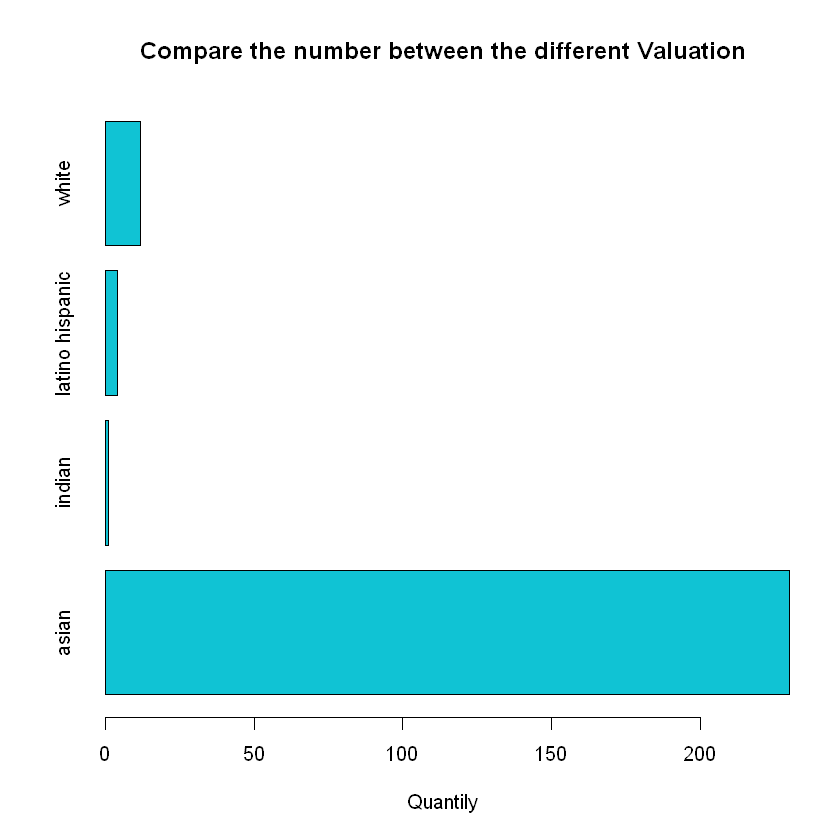

In [17]:
barplot(height=tab$Freq, names=tab$Var1,  
        col="#10c3d4",
        horiz=T, las=0,
        xlab="Quantily", 
        main="Compare the number between the different Valuation",
        )

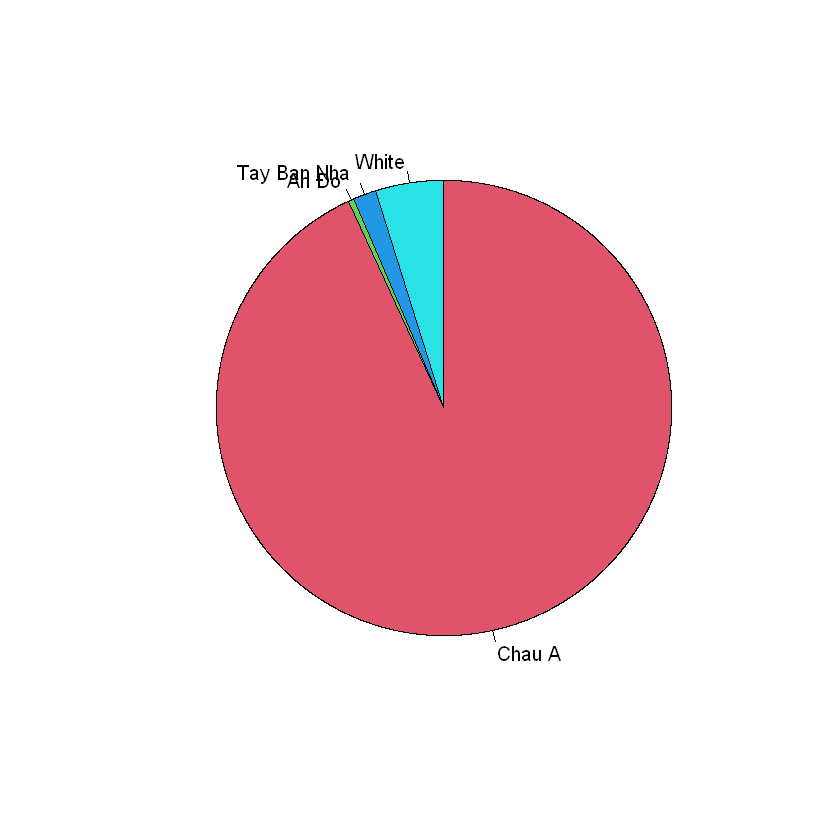

In [18]:
 pie(c(230,1,4,12), c("Chau A","An Đo"," Tay Ban Nha ","White"),
       col=2:5, edges=10000, lwd=10, clockwise=TRUE)

**Bảng đánh giá độ chính xác của dự đoán về tuổi**


**Phước**

Biểu đồ đánh giá dự đoán về tuổi theo phần trăm (bar chart)

In [19]:
tab = data.frame(table(df$Age_accuracy))
t(tab)

Var1,Bad prediction,Good prediction,Not Good prediction
Freq,159,48,40


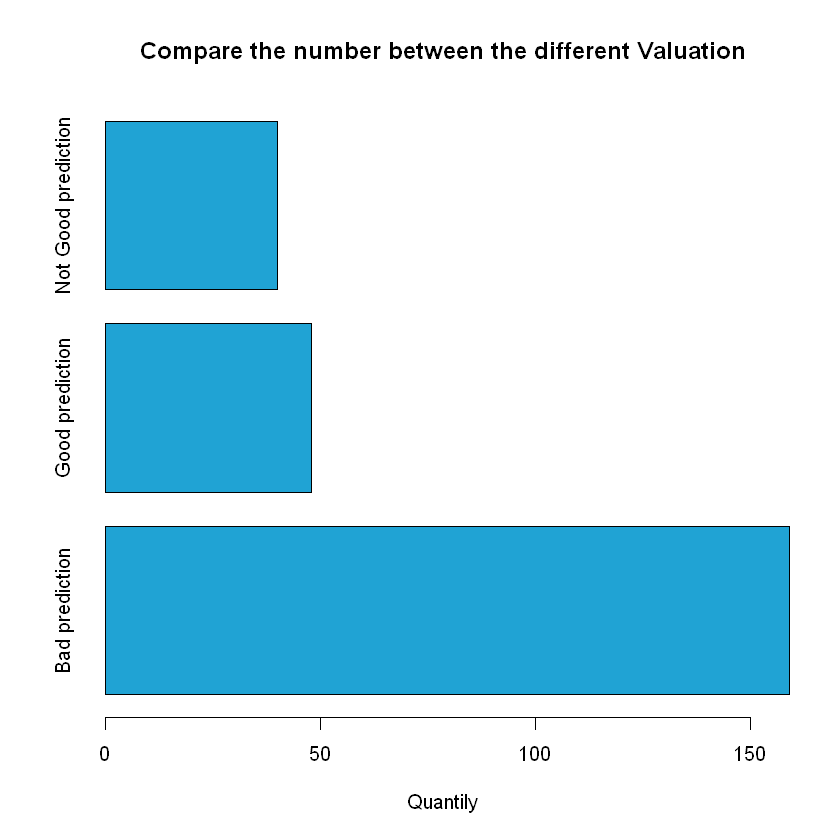

In [20]:
barplot(height=tab$Freq, names=tab$Var1,  
        col="#20a3d4",
        horiz=T, las=0,
        xlab="Quantily", 
        main="Compare the number between the different Valuation",
        )

Bảng trung bình dự đoán tuổi của các nhóm tuổi

In [36]:
data = aggregate(Guess_age ~ Age_group, df, mean)
head(data, 10)
data1 = aggregate(Age ~ Age_group, df, mean)
head(data1, 10)
data3 <-merge(x=data, y=data1, by.x="Age_group", by.y="Age_group")
data3

,Age_group,Guess_age
,<chr>,<dbl>
1,10 to 15,27.20000
2,15 to 20,26.10000
3,20 to 30,29.12195
4,30 to 40,28.66667
5,40 to 50,34.16667
6,5 to 10,27.28571
7,50 to 60,38.89286
8,60 to 70,38.42857
9,70 and up,45.53571


,Age_group,Age
,<chr>,<dbl>
1,10 to 15,13.166667
2,15 to 20,17.650000
3,20 to 30,25.243902
4,30 to 40,34.285714
5,40 to 50,46.500000
6,5 to 10,8.238095
7,50 to 60,55.071429
8,60 to 70,65.571429
9,70 and up,76.714286


Age_group,Guess_age,Age
<chr>,<dbl>,<dbl>
10 to 15,27.20000,13.166667
15 to 20,26.10000,17.650000
20 to 30,29.12195,25.243902
30 to 40,28.66667,34.285714
40 to 50,34.16667,46.500000
5 to 10,27.28571,8.238095
50 to 60,38.89286,55.071429
60 to 70,38.42857,65.571429
70 and up,45.53571,76.714286


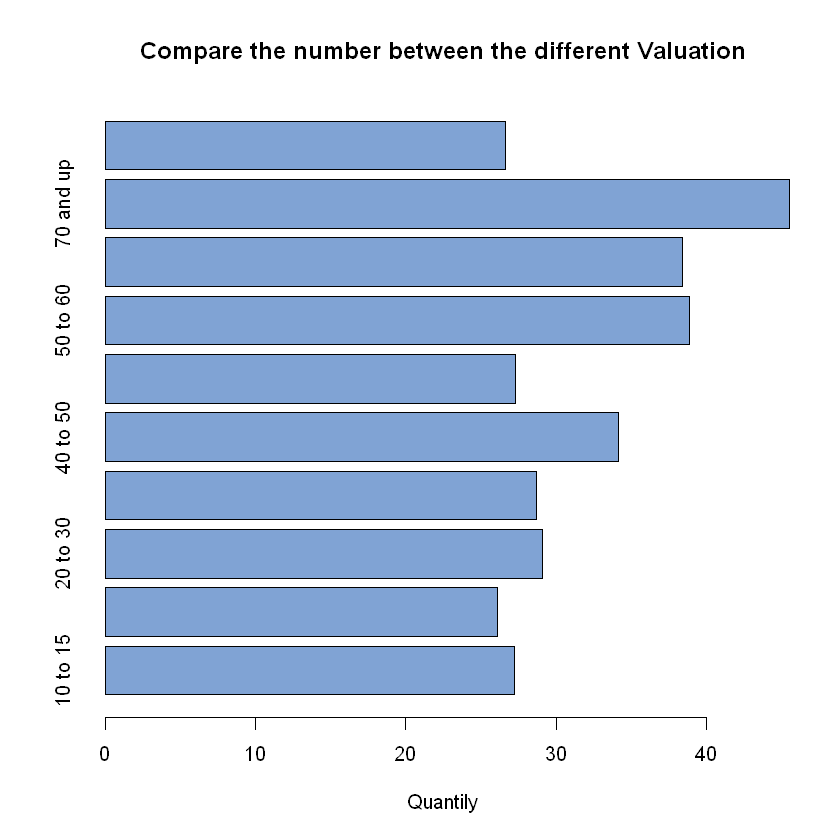

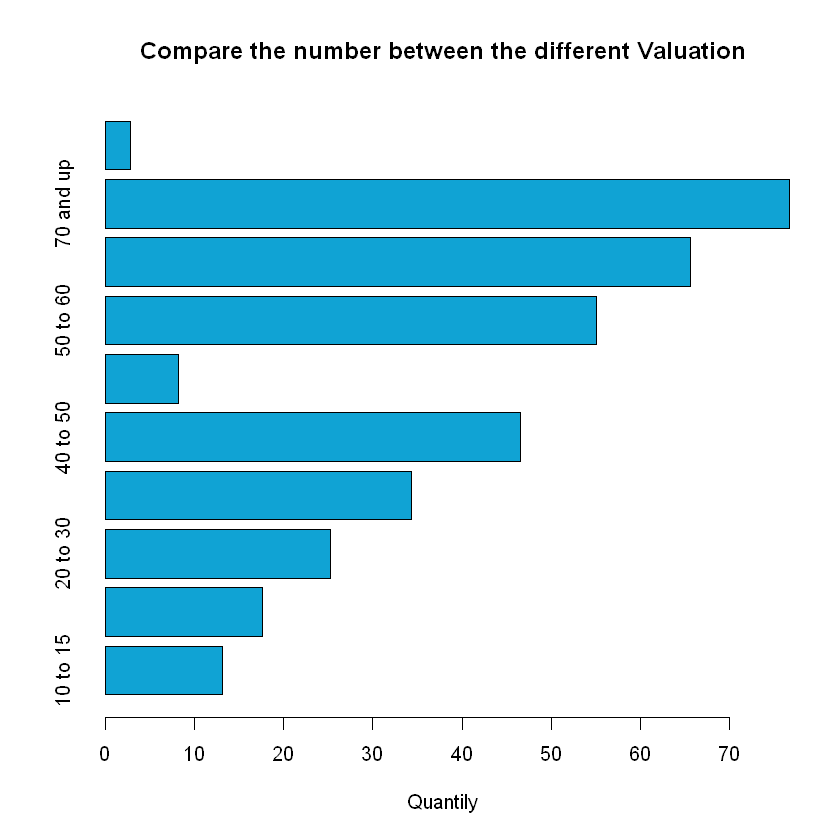

In [40]:
barplot(height=data3$Guess_age, names=data3$Age_group,  
        col="#80a3d4",
        horiz=T, las=0,
        xlab="Quantily", 
        main="Compare the number between the different Valuation"
        )
barplot(height=data3$Age, names=data3$Age_group,  
        col="#10a3d4",
        horiz=T, las=0,
        xlab="Quantily", 
        main="Compare the number between the different Valuation"
        )

----
# Các Phép kiểm định

Sử dụng kiểm định Chisquare để kiểm tra các yếu tố như Góc mặt, chất lượng ảnh có ảnh hưởng đến độ chính xác các dự đoán của DF không


**Phát biểu giả thuyết:**
**Phước**
+ H0:  Giới tính không ảnh hưởng đế nhóm tuổi   (các yếu tố này độc lập với nhau )
+ H1: Giới tính ảnh hưởng đến nhóm tuổi  ( các yếu tố này phụ thuộc nhau )

In [52]:
Tab = data.frame(table(df$Verify_gender,df$Age_group))
chisq.test(df$Verify_gender,df$Age_group)

colnames(Tab) <- c('Verify_gender','Age_group','Count')
head(Tab)


	Pearson's Chi-squared test

data:  df$Verify_gender and df$Age_group
X-squared = 14.159, df = 9, p-value = 0.1168


,Verify_gender,Age_group,Count
,<fct>,<fct>,<int>
1,FALSE,10 to 15,15
2,TRUE,10 to 15,15
3,FALSE,15 to 20,10
4,TRUE,15 to 20,10
5,FALSE,20 to 30,13
6,TRUE,20 to 30,28


#### nhận xét p value > 0.05 
Đủ điều kiện để chấp nhận H0, có nghĩa là giới tính không ảnh hưởng đến nhóm tuổi


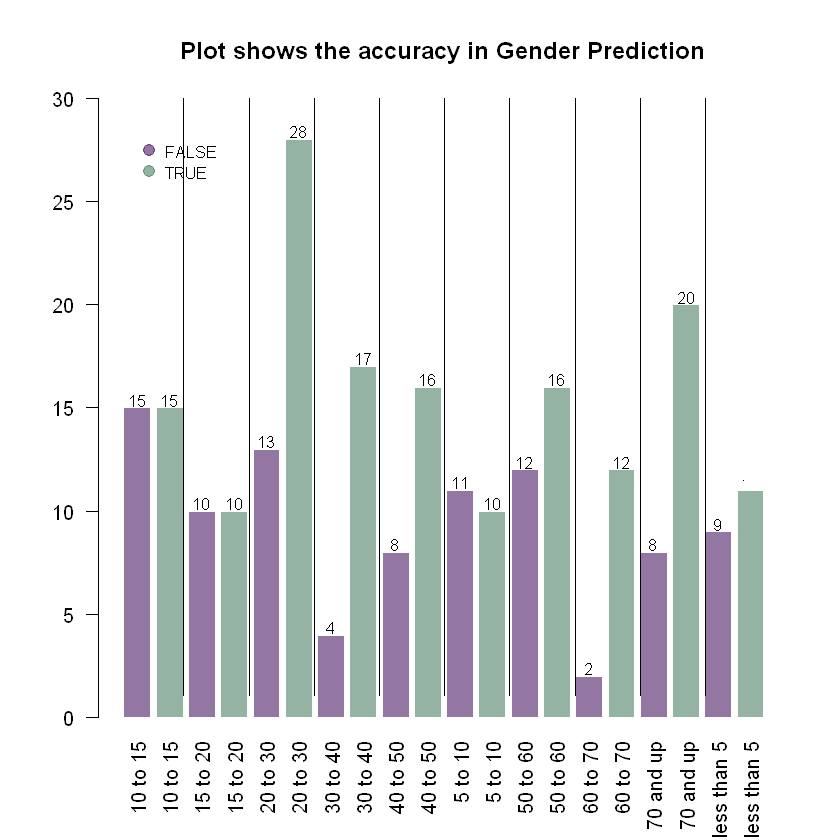

In [53]:
my_bar <- barplot(Tab$Count , border=F , names.arg=Tab$Age_group, 
                  las=2 , 
                  col=c(rgb(0.3,0.1,0.4,0.6) , rgb(0.3,0.5,0.4,0.6) ) , #, rgb(0.3,0.9,0.4,0.6) ,  rgb(0.3,0.9,0.4,0.6)
                  ylim=c(0,30) , 
                  main="Plot shows the accuracy in Gender Prediction" )
par(mar=c(6,4,4,4))
# Add abline
l = 4.85/2
abline(v=c(l ,2*l, 3*l,4*l, 5*l, 6*l, 7*l, 8*l,9*l) , col="black")
 
# Add the text 
text(my_bar, Tab$Count+0.4 , paste("", Tab$Count, sep="") ,cex=0.8) 
 
#Legende
legend("topleft", legend = c("FALSE","TRUE") , 
     col = c(rgb(0.3,0.1,0.4,0.6) , rgb(0.3,0.5,0.4,0.6)) , 
     bty = "n", pch=20 , pt.cex = 2, cex = 0.8, horiz = FALSE, inset = c(0.05, 0.05))


**Phát biểu giả thuyết:**
**Phước**
+ H0: Chất lượng hình ảnh không ảnh hưởng đến yếu tố kiểm tra giới tính ( 2 biến này độc lập với nhau )
+ H1: Chất lượng hình ảnh ảnh hưởng đến yếu tố kiểm tra giới tính ( 2 biến này phụ thuộc lẫn nhau )

In [23]:
table(df$Verify_gender,df$Quality)
chisq.test(df$Verify_gender,df$Quality)

       
        Good Hidden Normal Poor
  FALSE   36      5     17   34
  TRUE    80      3     21   51

Warning message in chisq.test(df$Verify_gender, df$Quality):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  df$Verify_gender and df$Quality
X-squared = 5.2858, df = 3, p-value = 0.152


Nhận xét: P > 0.05 : Chấp nhận H0, có nghĩa là chất lượng hình ảnh không ảnh hưởndg đến yếu tố xác minh giới tính

In [55]:
Tab = data.frame(table(df$Age_accuracy,df$Quality))
chisq.test(df$Age_accuracy,df$Quality)

colnames(Tab) <- c( 'Prediction','Quality','Count')
head(Tab)

Warning message in chisq.test(df$Age_accuracy, df$Quality):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  df$Age_accuracy and df$Quality
X-squared = 6.8631, df = 6, p-value = 0.3337


,Prediction,Quality,Count
,<fct>,<fct>,<int>
1,Bad prediction,Good,79
2,Good prediction,Good,18
3,Not Good prediction,Good,19
4,Bad prediction,Hidden,7
5,Good prediction,Hidden,0
6,Not Good prediction,Hidden,1


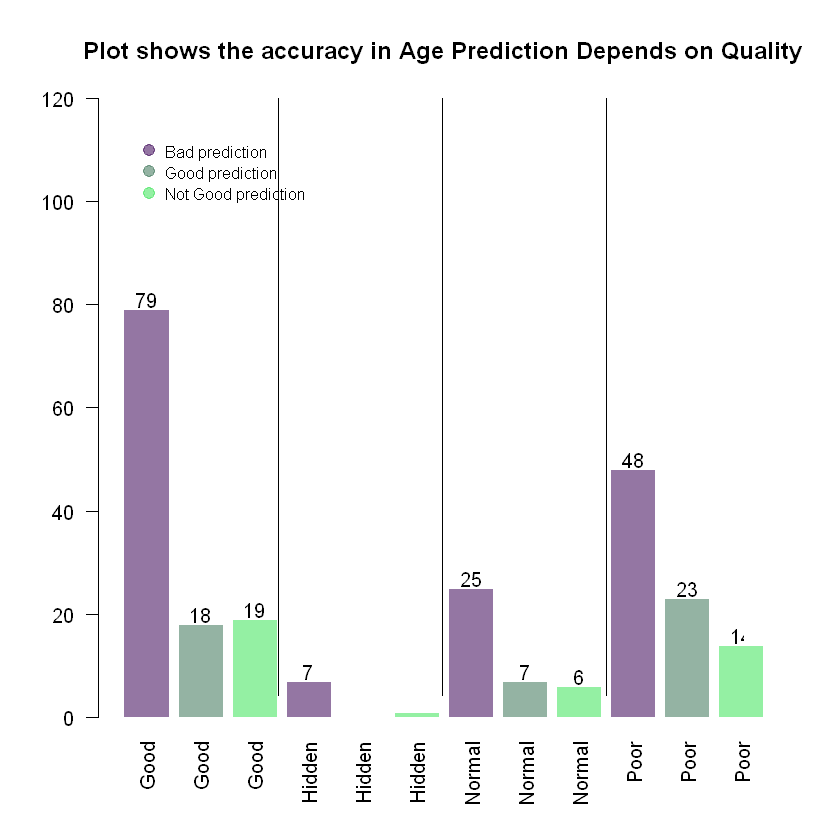

In [66]:
my_bar <- barplot(Tab$Count , border=F , names.arg=Tab$Quality, 
                  las=2 , 
                  col=c(rgb(0.3,0.1,0.4,0.6) , rgb(0.3,0.5,0.4,0.6) , rgb(0.3,0.9,0.4,0.6)) , #, rgb(0.3,0.9,0.4,0.6) ,  rgb(0.3,0.9,0.4,0.6)
                  ylim=c(0, 120) , 
                  main="Plot shows the accuracy in Age Prediction Depends on Quality" )
par(mar=c(6,4,4,4))
# Add abline
l = 4.85/4*3
abline(v=c(l ,2*l, 3*l,4*l, 5*l) , col="black")
 
# Add the text 
text(my_bar, Tab$Count+2 , paste("", Tab$Count, sep="") ,cex=1) 
 
#Legende
legend("topleft", legend = c("Bad prediction","Good prediction","Not Good prediction") , 
     col = c(rgb(0.3,0.1,0.4,0.6) , rgb(0.3,0.5,0.4,0.6), rgb(0.3,0.9,0.4,0.6)) , 
     bty = "n", pch=20 , pt.cex = 2, cex = 0.8, horiz = FALSE, inset = c(0.05, 0.05))

## Tương tự các phép kiểm định còn lại

In [25]:
table(df$Age_accuracy,df$Face_angle)
chisq.test(df$Age_accuracy,df$Face_angle)

                     
                      Left Right Straight
  Bad prediction        14    16      129
  Good prediction        7     7       34
  Not Good prediction    9     3       28

Warning message in chisq.test(df$Age_accuracy, df$Face_angle):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  df$Age_accuracy and df$Face_angle
X-squared = 7.1948, df = 4, p-value = 0.1259


In [26]:
table(df$Verify_gender,df$Face_angle)
chisq.test(df$Verify_gender,df$Face_angle)

       
        Left Right Straight
  FALSE   16    11       65
  TRUE    14    15      126


	Pearson's Chi-squared test

data:  df$Verify_gender and df$Face_angle
X-squared = 4.4511, df = 2, p-value = 0.108
